# 1814731 Shameel Nkosi
# 1390537 Siraj Motaung

### Linear Regression tut

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### We implement both closed form solution and the gradient descent 

###### Closed form function 

In [12]:
def closedForm(X , y):
    X_transpose = np.transpose(X)
    
    # The Moore-Penrose Pseudo Inverse
    Y = np.linalg.inv(X_transpose.dot(X))
    theta = Y.dot(X_transpose.dot(y))
    return theta

##### Below is a funciton which calculated the error  between the true y values vs the estimated  y values

In [13]:
def Error(yTrue , yEst):
    error = 0
    
    for i in range(len(yTrue)):
        error += (yTrue[i] - yEst[i])**2
    error *= .5
    return error

### -> Below we write a function that calculates the values given a dataset of x values and parameters... we going to use these values for computing errors late

In [14]:
def results(Paragms, dataSet,noise):
    values = np.array([])
    
    for i in dataSet:
        y = Paragms[0] + noise
        for j in range(1,len(Paragms)):
            y += Paragms[j]*(i**j)
        values = np.append(values , [y])
    return values

###### Below we calculate a design matrix  of a polynomail basis function

In [15]:
def designMatrix(polyDegree , x):
    
    
    n = len(x)
    t = np.ones(n)
    X = np.array([t])
    X = np.append(X,[x], axis = 0)    
    
    for i in range(2 , polyDegree+1):
        temp = np.array([x[0]**i])
        
        for j in range (1 ,n):
            temp = np.append(temp , x[j]**i)
            
        X = np.append(X,[temp], axis = 0)    
            
    X = np.transpose(X)
    return X

#x = [0,1,2,3,4,5]
#y = [1.1, -.7, -2.6, -3.7, -2.9, 1]
#plt.scatter(x,y)
#print(designMatrix(2,x)[2])


###### Below we generate 150 data points (x values), the 3 random true parameters and the y values corresponding to the x values 

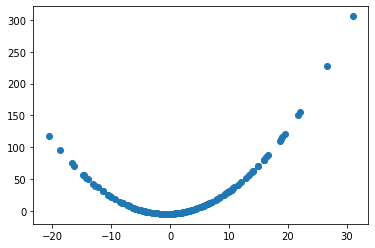

In [16]:
data_x = np.random.normal(0,10,150)
θ_ = np.random.rand(3)

noise = np.random.normal(0,10,1)[0]
data_y = results(θ_,data_x,noise)

    
plt.scatter(data_x , data_y)


#### Below we split the data we have into training , testing and validation sets

In [17]:
trainA = 100
testA = 30 + trainA
validA = 20 

x_train , x_test , x_validation = data_x[:trainA] , data_x[trainA:testA] , data_x[testA:]
y_train , y_test , y_validation = data_y[:trainA] , data_y[trainA:testA] , data_y[testA:]

#plt.scatter(x_train , y_train)
#plt.scatter(x_test , y_test)
#plt.scatter(x_validation , y_validation)

### 4 b. 
###### We begin by obtaining our theta i estimates using the closed form slolution
    we first obtain the design matrix of the 2nd degree polynomial
    We then calculate the Errors

In [18]:
DesignMatrix = designMatrix(2, x_train)
θ_est = closedForm(DesignMatrix , y_train)

yEst = results(θ_est,x_train,0)                         # Estimated values for our new parameters
yEstValidation = results(θ_est , x_validation , 0)      # Estimatated validation data used to calcute validation error
trainError = Error(y_train,yEst)                        # Training error
validationError = Error(yEstValidation , y_validation)  # Validation Error
print("True Parameters: ",θ_)
print("Estimated Parameters: ",θ_est)
print("Trainin Error: ",trainError)
print("Validation Error: ",validationError)

True Parameters:  [0.9879035  0.42758858 0.30848714]
Estimated Parameters:  [-4.12670704  0.42758858  0.30848714]
Trainin Error:  5.5446814356688986e-27
Validation Error:  1.3606124981832283e-27


#### 4 b. 
    ** These are very close. theta i where i is greater than one have the exact parameter and the difference is only in theta0 and the difference between the 2 is only the random noise we computed
    ** The errors values are very small which is what we expect

###### Below we plot the true y values as scatter plot and the estimates with the line plot

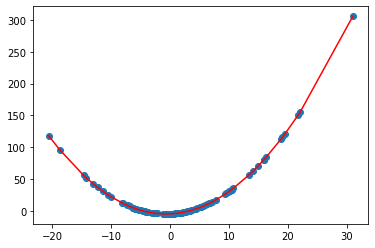

In [19]:
plt.scatter(x_train , y_train)
plt.plot(np.sort(x_train),results(θ_est,np.sort(x_train),0),color="red")

### FROM HERE WE NEED TO IMPLEMENT THE GRADIENT DESCENT
     * And we plot what our results 

[0.85121756 0.53259208 0.27913043]


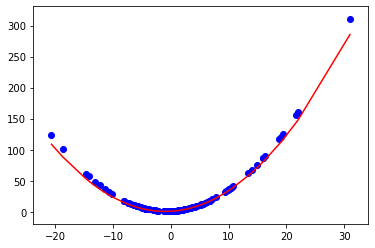

In [20]:
def f(x , θ):
    return np.dot(x,θ)

def gradientDescent(polyDegree , trainSetX , trainSetY):
    n = polyDegree         # Here I just set n = polyDegree so that I can work faster and not having to type everything
    θ = np.ones(n+1)       # we start with our theta values being ones
    θ_old = np.zeros(n+1)
    c = 0
    α = 1.1e-5            # define our learning rate
    X = designMatrix(n , trainSetX) 
    
    while np.sqrt(np.sum(np.power(θ - θ_old, 2))) > 0.01:
        θ_old = θ
        for i in range(len(X)):
            θ = θ - α*(f(X[i],θ) - trainSetY[i])*X[i]
        c +=1
    plt.plot(np.sort(x_train),results(θ,np.sort(x_train),0),color="red")
    plt.scatter(np.sort(x_train),results(θ_,np.sort(x_train),0),color="blue") 
    print(θ)
    

#gradientDescent(2,x_train,y_train)
gradientDescent(2,data_x,data_y)